# 画像の分割

In [6]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
# 画像の読み込み
image = cv2.imread('IMG_2BCE1EB797B2-1.JPG')

In [8]:
# グレイスケールに変換しぼかした上で二値化する 
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

In [9]:
# 輪郭を抽出 --- (※1)
contours = cv2.findContours(
    thresh,      
    cv2.RETR_EXTERNAL, 
    cv2.CHAIN_APPROX_SIMPLE)[0]

In [10]:
# 抽出した領域を繰り返し処理する 
bound_rects=[cv2.boundingRect(c) for c in contours]
#bound_rectsは(x,y,w,h)のリスト

In [11]:
df_bound_rects=pd.DataFrame(bound_rects)
df_bound_rects.columns = ['x', 'y', 'w','h']

In [12]:
df_bound_rects

,x,y,w,h
0,214,1381,10,16
1,560,1371,7,10
2,527,1370,11,9
3,214,1370,9,8
4,529,1369,28,27
...,...,...,...,...
323,503,45,77,95
324,411,40,84,101
325,313,40,91,100
326,239,39,67,102


In [13]:
df_bound_rects.describe()

,x,y,w,h
count,328.000000,328.000000,328.000000,328.000000
mean,327.353659,660.695122,22.881098,27.006098
std,174.236535,385.823118,41.375522,13.869641
min,69.000000,22.000000,5.000000,3.000000
25%,181.000000,305.000000,11.000000,19.000000
50%,285.000000,620.000000,19.000000,30.000000
75%,502.250000,951.000000,23.000000,32.000000
max,628.000000,1381.000000,532.000000,102.000000


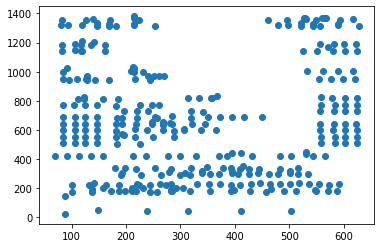

In [14]:
#文字の座標
plt.scatter(df_bound_rects["x"],df_bound_rects["y"])
plt.show()

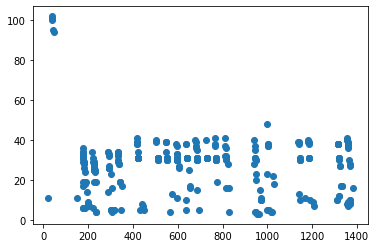

In [15]:
#y座標と文字幅
plt.scatter(df_bound_rects["y"],df_bound_rects["h"])
plt.show()

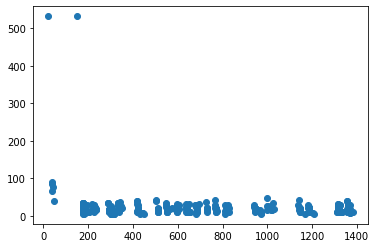

In [16]:
#yと文字の高さ
plt.scatter(df_bound_rects["y"],df_bound_rects["w"])
plt.show()

In [46]:
cutting_y_line=df_bound_rects["y"][0]
n=0
for cnt in contours:# 抽出した領域を繰り返し処理する 
    x, y, w, h = cv2.boundingRect(cnt)
    if h < 20: continue # 小さすぎるのは飛ばす
    if abs(cutting_y_line-y)<20:#同じ行かどうか
        cutting_y_line=min(cutting_y_line,y)#より上にcuttinglineを設定して文字が切れないように
    else:#同じ行じゃなかったら
        print(cutting_y_line)
        file_name="cut_image_"+str(n)+".png"
        n+=1
        cv2.imwrite(file_name,image[y-5:cutting_y_line+5,])
        cutting_y_line=y

1357
1315
1183
1139
1025
999
942
811
767
724
679
637
591
549
505
417
333
289
219
175


In [36]:
trimmed_image=image[549:591]

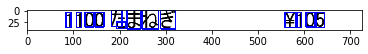

In [37]:
plt.imshow(trimmed_image)

# OCR

In [25]:
# ocr_card.py
import os
from PIL import Image
import pyocr
import pyocr.builders

# 1.インストール済みのTesseractのパスを通す
path_tesseract = "C:\\Program Files (x86)\\Tesseract-OCR"
if path_tesseract not in os.environ["PATH"].split(os.pathsep):
    os.environ["PATH"] += os.pathsep + path_tesseract

# 2.OCRエンジンの取得
tools = pyocr.get_available_tools()
tool = tools[0]

# 3.原稿画像の読み込み
img_org = Image.open("./card_image/zairyucard_omote.jpg")

# 4.ＯＣＲ実行
builder = pyocr.builders.TextBuilder()
result = tool.image_to_string(img_org, lang="jpn", builder=builder)

print(result)

IndexError: list index out of range